# Fibre Orientation from Projected Images


## Methods of analysis
Three different methods are proposed for the analysis of fibre orientation from projected images. They are:
1. Intercept method
2. Principal component analysis
3. Structure tensor method

The implementation of each of this method is discussed in this section.

### 1. Structure tensor method

Structure tensor of an image can be used to find the orientation of features in it [1]. At any point in the image, the structure tensor is essentially a covariane matrix of the intensity gradient of the grayscale values with respect to x- and y-axes in the local neighbourhood. The the local neighbourhood is selected piecewise by sliding a window across the image or by using a Gaussian convolution. In the latter case, the standard deviation $\sigma$ becomes a measure of the size of the local neighbourhood. The latter technique yields a value for the intensity gradient, and therefore the structure tensor, at every pixel of the image. The relative magnitudes of the eigenvalues are representative of the geometry of the feature present in the image. Naturally, the eigenvectors become the local axes of the feature along its local orientation.

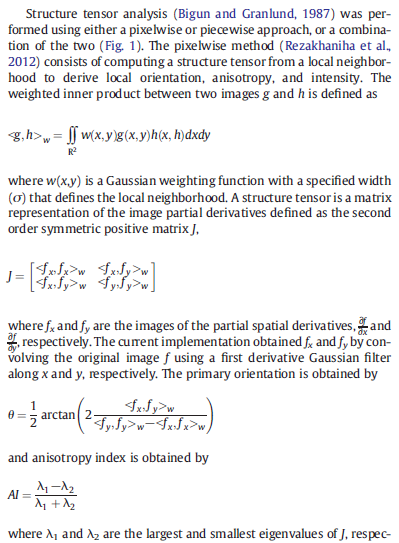

Since the local neighbourhood selected for the calculation of structure tensor must capture the fibre and its local surrounding, the optimal value of $\sigma$ is equal to the fibre diameter. The Gaussian kernel used is roughly four times $\sigma$, sufficiently larger than the width of a fibre in its projected image. Convolution using Gaussian kernel is faster and efficient than a piecewise technique owing to the following properties:

Consider an image with grayscale intensity at each point $(x, y)$ as $I(x, y)$,
1. The gradient of the intensity can be found by convolving with the kernel corresponding to first derivation of the gaussian function:

$$g * \left(\frac{\partial I(x, y)}{\partial x}\right) = \frac{\partial g}{\partial x} * I(x, y) \tag{1}$$

2. The convolution operation in image space becomes a simple product in the Fourier space:
$$\frac{\partial g}{\partial x} * I(x, y) = \mathscr{F}^{-1}\left[\mathscr{F}\left(\frac{\partial g}{\partial x}\right)\times \mathscr{F}\left(I(x, y)\right)\right]$$

where g is the Gaussian kernel corresponding to the normal distribtion truncated at $4 \times \sigma$.
        

Reference:
[1] Budde, M.D. and Frank, J.A., 2012. Examining brain microstructure using structure tensor analysis of histological sections. Neuroimage, 63(1), pp.1-10.

## 2. Structure tensor applied to arrays of fibres
To evaluate the feasibility of structure tensor method applied to SFRC, synthetic images containing an array of fibres is studied. In the first image all fibres are oriented in the same orientation of 90 degrees with respect to the x-axis (positive x-direction to the right). The 

In [1]:
%config Completer.use_jedi = False
import os
import sys
os.chdir('..')
cwd = os.getcwd()
sys.path.append(cwd)

import numpy as np
import skimage.io as skio
from skimage.transform import rescale
from skimage.feature import structure_tensor
import matplotlib as mpl
from matplotlib import pyplot as plt
from coords import coord
from PyImModules.matplotlib_settings import *
from IPython.display import Image

mpl.rcParams['figure.dpi']=150

data_dir1 = "C:\\Users\\z5218869\\OneDrive - UNSW\\2RESEARCH\\4_Image Processing\\ProjImageAnalysis\\data\\set1_proj_imgs\\ip_rescaled"
data_dir2 = "C:\\Users\\z5218869\\OneDrive - UNSW\\2RESEARCH\\4_Image Processing\\ProjImageAnalysis\\SFRS_data"


Bad key "text.kerning_factor" on line 4 in
C:\Users\z5218869\Miniconda3\envs\pyimgc38\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# READ IMAGE: Image with array of fibres in x-direction
in_fname = "fibres_vf0.01_theta90_phi90_rescaled.png"
in_fpath = os.path.join(data_dir1, in_fname)

img0 = skio.imread(in_fpath)
img0_rsc = rescale(img0, 2, anti_aliasing=True)
print("Rescaled image dimensions: ", img0_rsc.shape)

Rescaled image dimensions:  (280, 280)


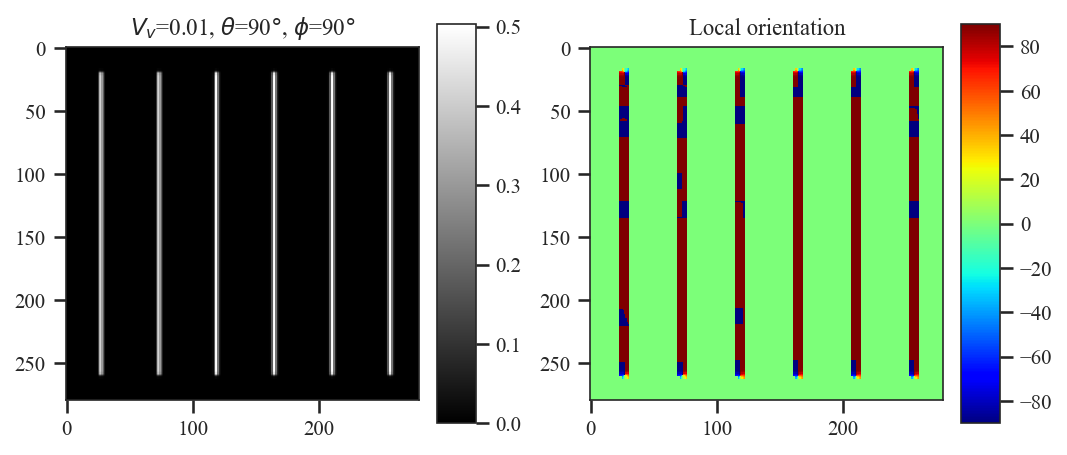

In [3]:
# Structure tensor
J0 = structure_tensor(img0_rsc, sigma=1.5)
phi0 = np.rad2deg(0.5 * np.arctan2(2*J0[1], J0[2]-J0[0]))

# PLOTS: IMAGES
img_mask = img0_rsc > 0  # binarize fibre image used as a mask
fig, axes = plt.subplots(1, 4, figsize=(7, 3), gridspec_kw=dict(width_ratios=[0.45, 0.05, 0.45, 0.05]))
axs = axes.ravel()

# show original image
im0 = axs[0].imshow(img0_rsc, cmap='gray') 
axs[0].set_title(r"$V_v$=0.01, $\theta$=90$\degree$, $\phi$=90$\degree$")
plt.colorbar(im0, cax=axs[1])

# show local orientation
im1 = axs[2].imshow(phi0*img_mask, cmap='jet')  # using mask to select only values lying on fibre pixels
axs[2].set_title("Local orientation")

plt.colorbar(im1, cax=axs[3])

In [4]:
# READ IMAGE: Image with array of fibres in x-direction
in_fname = "fibres_vf0.01_theta90_phi60_rescaled.png"
in_fpath = os.path.join(data_dir1, in_fname)

img1 = skio.imread(in_fpath)
img1_rsc = rescale(img1, 2, anti_aliasing=True)
print("Rescaled image dimensions: ", img1_rsc.shape)

in_fname = "fibres_vf0.01_theta90_phi30_rescaled.png"
in_fpath = os.path.join(data_dir1, in_fname)

img2 = skio.imread(in_fpath)
img2_rsc = rescale(img2, 2, anti_aliasing=True)
print("Rescaled image dimensions: ", img2_rsc.shape)

Rescaled image dimensions:  (280, 280)
Rescaled image dimensions:  (280, 280)


In [25]:
# Superposition of images
img_rsc = img0_rsc + img1_rsc + img2_rsc
img_rsc = (img_rsc > 0).astype(np.uint8)  # binarizing

# Structure tensor
J0 = structure_tensor(img_rsc, sigma=1.5)
phi0 = np.rad2deg(0.5 * np.arctan2(2*J0[1], J0[2]-J0[0]))

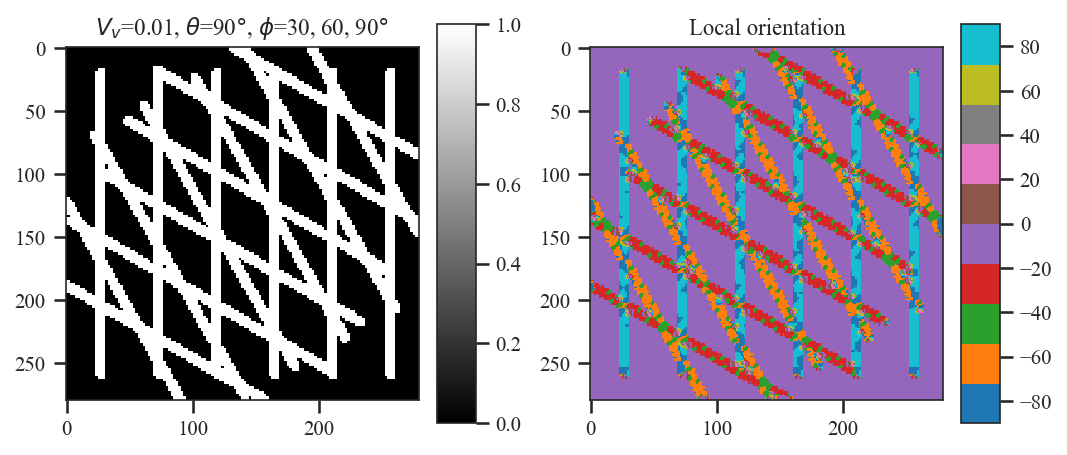

In [33]:
# PLOTS: IMAGES
img_mask = img_rsc > 0
fig, axes = plt.subplots(1, 4, figsize=(7, 3), gridspec_kw=dict(width_ratios=[0.45, 0.05, 0.45, 0.05]))
axs = axes.ravel()

# show original image
im0 = axs[0].imshow(img_rsc, cmap='gray') 
axs[0].set_title(r"$V_v$=0.01, $\theta$=90$\degree$, $\phi$=30, 60, 90$\degree$")
plt.colorbar(im0, cax=axs[1])

# show local orientation
im1 = axs[2].imshow(phi0*img_mask, cmap='tab10')  # using mask to select only values lying on fibre pixels
axs[2].set_title("Local orientation")
plt.colorbar(im1, cax=axs[3])

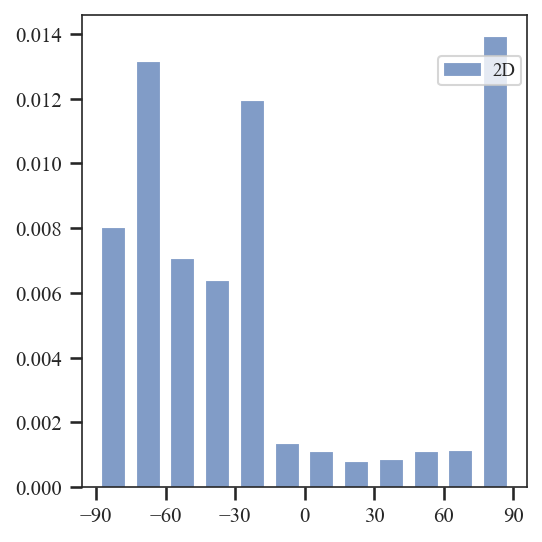

In [10]:
# Proportion of fibres in each orientation
phi_vals = phi0[np.nonzero(img_mask)]
h, b = np.histogram(phi_vals.ravel(), bins=np.arange(-90, 91, 15), density=True)  # generate histogram

fig, ax = plt.subplots(1, 1, figsize=(3.5, 3.5))
bar_centres = 0.5*(b[1:] + b[:-1])
bars= ax.bar(bar_centres, h, width=10, bottom=0.0, alpha=0.7, linewidth=0.1, label='2D')

plt.xticks(np.arange(-90, 91, 30))
ax.legend(loc=(0.8, 0.85))

## Analysis of steel fibre reinforced shotcrete

In [11]:
# READ IMAGE:
in_fname = "SF40D_6_z0to1080_bin.tiff"
in_fpath = os.path.join(data_dir2, in_fname)

img = skio.imread(in_fpath)
print("Image dimensions: ", img.shape)

Image dimensions:  (705, 705)


In [12]:
sigma = 1
J = structure_tensor(img, sigma=sigma)
phi = np.rad2deg(0.5 * np.arctan2(2*J[1], J[2]-J[0]))

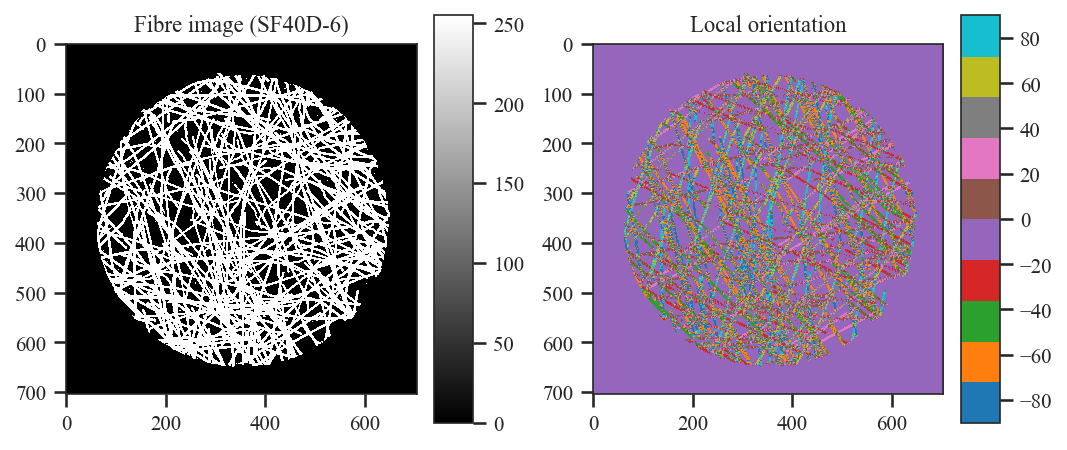

In [37]:
# PLOTS: IMAGES
img_mask = img > 0  # binarize fibre image used as a mask
fig, axes = plt.subplots(1, 4, figsize=(7, 3), gridspec_kw=dict(width_ratios=[0.45, 0.05, 0.45, 0.05]))
axs = axes.ravel()

# show original image
im0 = axs[0].imshow(img, cmap='gray') 
axs[0].set_title("Fibre image (SF40D-6)")
plt.colorbar(im0, cax=axs[1])

# show local orientation
im1 = axs[2].imshow(phi*img_mask, cmap='tab10')  # using mask to select only values lying on fibre pixels
axs[2].set_title("Local orientation")
plt.colorbar(im1, cax=axs[3])

In [14]:
# PLOTS: HISTOGRAMS
# From the local orientation analysis of proected image.
phi_vals_proj = phi[np.nonzero(img_mask)]  # selecting orientation values only from locations of fibre pixels.
bins = np.arange(-90, 91, 10)
plt_phi = np.radians(bins)[:-1]
width = np.pi / len(bins)

hist_proj, b_proj = np.histogram(phi_vals_proj, bins=bins, density=True)  # generate histogram

In [15]:
# From the orientation information of individual fibres obtained from 3D micro-CT

# Read excel file
import pandas as pd
in_xldir = "C:\\Users\\z5218869\\OneDrive - UNSW\\2RESEARCH\\4_Image Processing\\Project3_PyImg\\microCT_SFRC\SFRS plots\\data2"
xlfile = "SF40D_6_LoRes_full_fib_fibprops_edt.xlsx"

xl = pd.ExcelFile(os.path.join(in_xldir, xlfile))
df_fib = xl.parse(sheet_name='fibdata', index_col=0)  # reading fibre data from excel

# Read phi values and convert to the principal domain
phi_vals_3D = df_fib['Phi']  # values between (0, 360) degrees
phi_vals_3D = np.rad2deg(np.arcsin(np.sin(np.deg2rad(phi_vals_3D))))  # values between (-90, 90) degrees

hist_3D, b_3D = np.histogram(phi_vals_3D, bins=bins, density=True)  # generate histogram

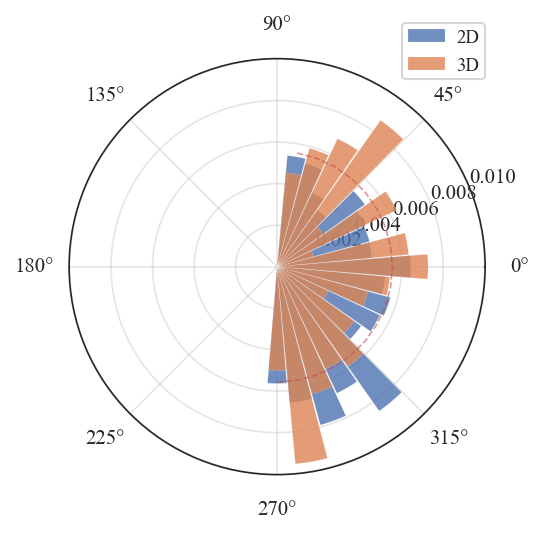

In [16]:
# Histogram plot (polar)
fig, ax = plt.subplots(1, 1, figsize=(3.5, 3.5), subplot_kw=dict(polar=True))  # polar figure

bars_proj = ax.bar(plt_phi, hist_proj, width=width, bottom=0.0, alpha=0.8, linewidth=0.1, label='2D')
bars_3D = ax.bar(plt_phi, hist_3D, width=width, bottom=0.0, alpha=0.8, linewidth=0.1, label='3D')

plt_radii = np.average(hist_proj) * np.ones(len(plt_phi))
ax.plot(plt_phi, plt_radii, 'r--', linewidth=0.8, alpha=0.6)  # corresponding to isotropic distribution

ax.grid(linewidth=0.8, alpha=0.5)
ax.legend(loc=(0.8, 0.95))  # Insert legent at given location

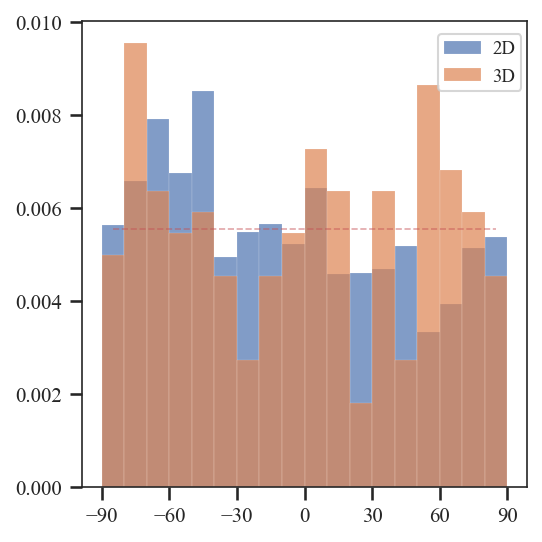

In [17]:
# Histogram plot (rectangular):
fig, ax = plt.subplots(1, 1, figsize=(3.5, 3.5))

bar_centres = 0.5*(bins[1:] + bins[:-1])
bars_proj = ax.bar(bar_centres, hist_proj, width=10, bottom=0.0, alpha=0.7, linewidth=0.1, label='2D')
bars_3D = ax.bar(bar_centres, hist_3D, width=10, bottom=0.0, alpha=0.7, linewidth=0.1, label='3D')

plt_radii = np.average(hist_proj) * np.ones(len(bar_centres))
ax.plot(bar_centres, plt_radii, 'r--', linewidth=0.8, alpha=0.5)

# ax.grid(linewidth=0.8, alpha=0.3)
plt.xticks(np.arange(-90, 91, 30))
ax.legend(loc=(0.8, 0.85))

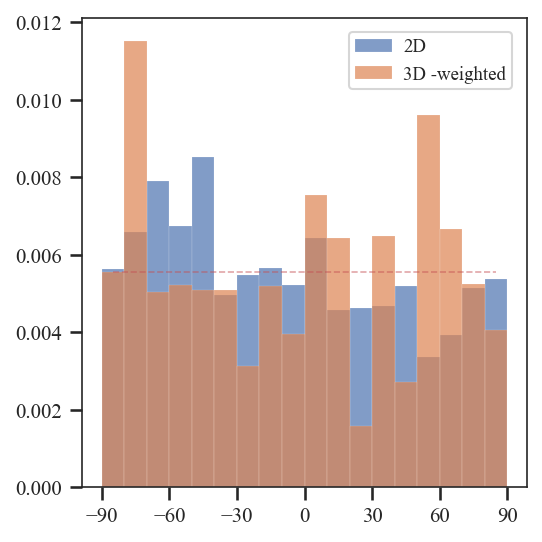

In [18]:
# Histogram (weighted with fibre length):
fiblen_proj = df_fib['Length'] * np.sin(np.deg2rad(df_fib['Theta']))
hist_3Dw, b_3Dw = np.histogram(phi_vals_3D, bins=bins, density=True, weights=fiblen_proj)  # generate histogram

fig, ax = plt.subplots(1, 1, figsize=(3.5, 3.5))

bars_proj = ax.bar(bar_centres, hist_proj, width=10, bottom=0.0, alpha=0.7, linewidth=0.1, label='2D')
bars_3D = ax.bar(bar_centres, hist_3Dw, width=10, bottom=0.0, alpha=0.7, linewidth=0.1, label='3D -weighted')

plt_radii = np.average(hist_proj) * np.ones(len(bar_centres))
ax.plot(bar_centres, plt_radii, 'r--', linewidth=0.8, alpha=0.5)

# ax.grid(linewidth=0.8, alpha=0.3)
plt.xticks(np.arange(-90, 91, 30))
ax.legend(loc=(0.6, 0.85))  # Insert legent at given location

In [19]:
# TENSOR

def pmf_to_tensor(alpha, pmf_alpha):
    c = np.cos(np.deg2rad(alpha))
    s = np.sin(np.deg2rad(alpha))
    eta_xx = np.average(c*c, weights=pmf_alpha)
    eta_xy = np.average(c*s, weights=pmf_alpha)
    eta_yy = np.average(s*s, weights=pmf_alpha)
    eta_tensor = np.array([[eta_xx, eta_xy], [eta_xy, eta_yy]])
    
    return eta_tensor

eta_tensor_proj = pmf_to_tensor(bar_centres, hist_proj)
eta_tensor_3D = pmf_to_tensor(bar_centres, hist_3D)
eta_tensor_3Dw = pmf_to_tensor(bar_centres, hist_3Dw)

print(" Tensor from projected image: \n", eta_tensor_proj)
print("\n\n Tensor from 3D image: \n", eta_tensor_3D)
print("\n\n Tensor from 3D image (weighted using fibre projected length): \n", eta_tensor_3Dw)

 Tensor from projected image: 
 [[ 0.49037406 -0.05794913]
 [-0.05794913  0.50962594]]


 Tensor from 3D image: 
 [[0.46278703 0.00248072]
 [0.00248072 0.53721297]]


 Tensor from 3D image (weighted using fibre projected length): 
 [[0.45890528 0.00477552]
 [0.00477552 0.54109472]]


In [20]:
def eigen(tensor):
    eig_vals, eig_vecs = np.linalg.eig(tensor)
    indices = np.argsort(np.abs(eig_vals))
    return eig_vals[indices], eig_vecs[:, indices]

eigvals_proj, eigvecs_proj = eigen(eta_tensor_proj)
eigvals_3Dw, eigvecs_3Dw = eigen(eta_tensor_3Dw)

print("Projected image: ")
print("Eigen values: ", eigvals_proj)
print("Eigen vectors: ", eigvecs_proj)

print("\n\n3D image: ")
print("Eigen values: ", eigvals_3Dw)
print("Eigen vectors: ", eigvecs_3Dw)

Projected image: 
Eigen values:  [0.44125683 0.55874317]
Eigen vectors:  [[-0.76284494  0.64658146]
 [-0.64658146 -0.76284494]]


3D image: 
Eigen values:  [0.45862873 0.54137127]
Eigen vectors:  [[-0.99832748 -0.05781207]
 [ 0.05781207 -0.99832748]]


In [21]:
# ERROR

rmse = np.linalg.norm(eigvals_proj - eigvals_3Dw)
rel_err = rmse / np.mean(eigvals_3Dw)

print("Root mean square error: ", round(rmse, 4))
print("Relative error (RMSE): {} %".format(round(100*rel_err, 2)))

Root mean square error:  0.0246
Relative error (RMSE): 4.91 %
